In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Telecom Customer.csv")

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Handle missing values
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype(float)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                     'Contract', 'PaperlessBilling', 'PaymentMethod'])

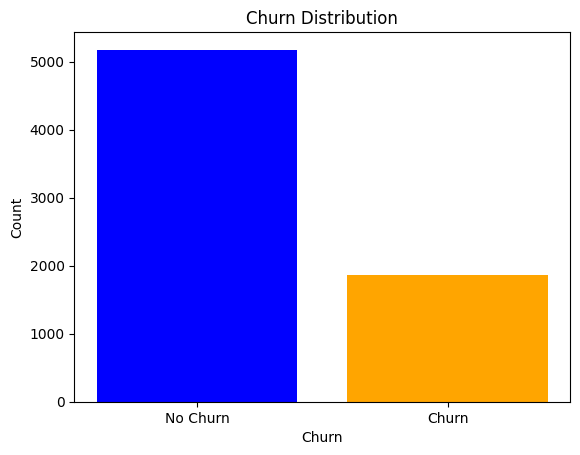

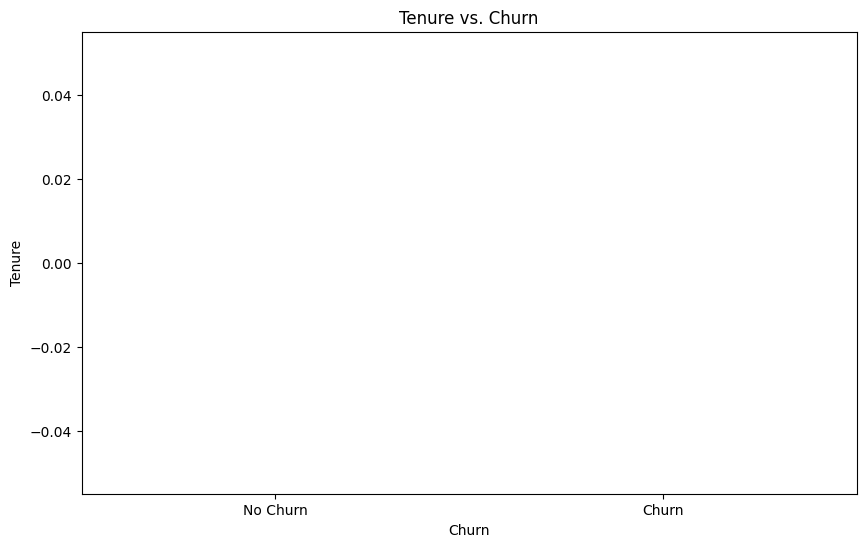

In [5]:
import matplotlib.pyplot as plt

# Explore churn distribution
churn_counts = data['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, ['No Churn', 'Churn'])
plt.show()

# Explore tenure vs. churn
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Churn'] == 0]['tenure'], data[data['Churn'] == 1]['tenure']], labels=['No Churn', 'Churn'])
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
churn_model = LogisticRegression()
churn_model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = churn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

ValueError: could not convert string to float: '4223-BKEOR'

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter out non-churning customers
revenue_data = data[data['Churn'] == 0]

# Split data for revenue prediction
X_rev = revenue_data.drop('TotalCharges', axis=1)
y_rev = revenue_data['TotalCharges']

X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# Train a Linear Regression model
revenue_model = LinearRegression()
revenue_model.fit(X_train_rev, y_train_rev)

# Predict revenue on test set and evaluate
y_pred_rev = revenue_model.predict(X_test_rev)
mse = mean_squared_error(y_test_rev, y_pred_rev)

print(f"Mean Squared Error: {mse:.2f}")

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.